<a href="https://colab.research.google.com/github/hevendra630/ML_RESEACRH-_INTERNSHIP/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 0.9888888888888889
predictions:
[0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0]


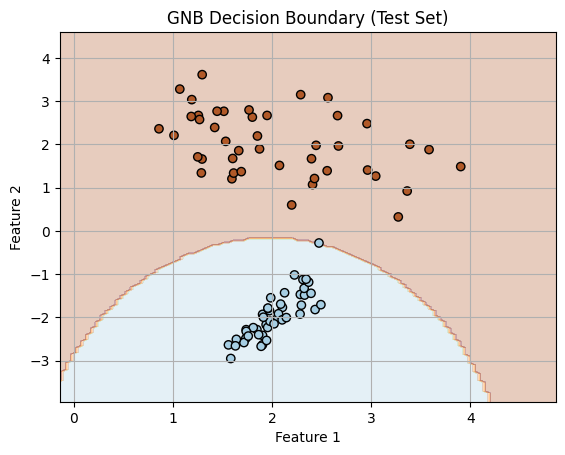

In [ ]:
# Step-by-step Manual Gaussian Naive Bayes on Real Data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate realistic classification dataset (2 features, 2 classes)
X, y = make_classification(
    n_samples=300,         # total samples
    n_features=2,          # 2 features for 2D visualization
    n_informative=2,       # clean features and useful for prediction
    n_redundant=0,         # no.of dups
    n_clusters_per_class=1,# cluster means no.of subgroups in out data
    class_sep=2.0,     #says how far are the class points
    random_state=42
)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42    #test_ size  is the % of data used to test
)

# Step 3: Calculate priors, means, variances for each class (from training set)
classes = np.unique(y_train)   # no . of  uniq  classes in the data
priors = {k: np.mean(y_train == k) for k in classes} ## counting data in esch class
means = {} # a dictionaey
variances = {} # dicxtionary

for k in classes:      # HERE CLASSES LIST AS ONLY 0 OR 1
    X_k = X_train[y_train == k]  # X_K in the sense each feature (k =1,2,3,4,5.....)
    means[k] = np.mean(X_k, axis=0)   # here we calculate mean and variance of each features in each class
    variances[k] = np.var(X_k, axis=0)

# Step 4: Gaussian log-likelihood
def gaussian_log_likelihood(x, mean, var):  #this returns log(p(x  | mean,variance ))  #here x is a set or a row
    return -0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)  # THIS GIVES VALUE OF LOG OF Prob

# Step 5: Predict using manual Gaussian Naive Bayes
def predict_gnb(X):   #THIS FUNCTION PREDICTS THE CLASS FOR EACH FEATURE X
    preds = []
    for x in X:
        log_probs = {}
        for k in classes:
            log_prob = np.log(priors[k])  # LOG P(y=k)   i-e,log of prior of class k
            log_prob += np.sum(gaussian_log_likelihood(x, means[k], variances[k]))  # computing the log-likelihood of the sample’s features assuming it belongs to class k
            log_probs[k] = log_prob # total log-probability of class k is stored in our dictionary
        preds.append(max(log_probs, key=log_probs.get))  # storing most likely class of x
    return np.array(preds)

# Step 6: Predict on test set
y_pred = predict_gnb(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("predictions:")
print(y_pred)

# Step 7: Plot decision boundary
def plot_boundary(X, y, title="GNB Decision Boundary"):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_gnb(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Show decision boundary on test set
plot_boundary(X_test, y_test, "GNB Decision Boundary (Test Set)")

#likelihood is prob of seeing a feature for a given class k
